---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.16.7
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

# Лабораторная работа 2. Пакет Matplotlib

Продолжительность работы: - 4 часа.

Мягкий дедлайн (10 баллов): 13.03.2025

Жесткий дедлайн (5 баллов): 27.03.2025

Оценка за каждое задание указана в комментариях перед заданием.

Задание выполняется самостоятельно, в противном случае все причастные получат 0 баллов :)
Если вы нашли решение любого из заданий (или его части) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце своей работы. 
В противном случае **работа также будет оценена в 0 баллов**.


### Задание 1 (1 балл)

Сгенерируйте массив нормально распределенных значений размерности 2 из 100 точек (выберите среднее значение $\mu$ и среднее квадратическое отклонение $\sigma$ по своему выбору). 
Проверьте правило трех сигм: нарисуйте окружность с центром в точке $\mu$ с таким радиусом, чтобы на нее приходилось 0,99 всех точек, а также окружность радиусом 3 сигмы. 
Выделите точку $\mu$ отдельным цветом.


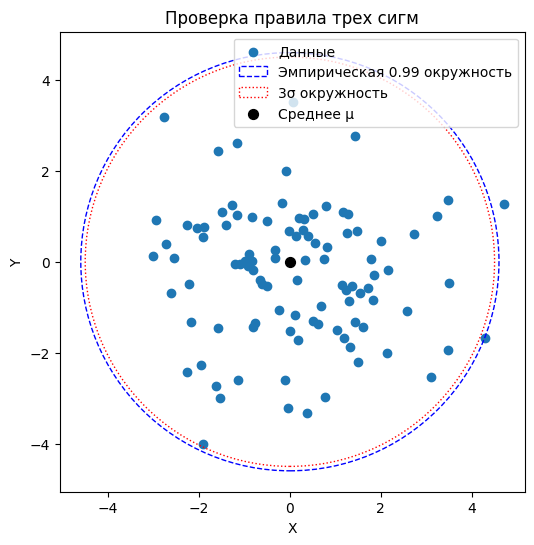

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Выбираем параметры
mu = np.array([0, 0])
sigma = 1.5

# Генерируем 100 точек размерности 2, нормально распределенных
data = np.random.normal(loc=mu, scale=sigma, size=(100, 2))

# Вычисляем расстояния от mu
distances = np.linalg.norm(data - mu, axis=1)

# Находим радиус, включающий 99% точек (эмпирически)
r99 = np.percentile(distances, 99)

# Радиус по правилу трех сигм
r3sigma = 3 * sigma

# Рисуем точки, окружности и отметку для mu
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(data[:, 0], data[:, 1], label='Данные')
circle1 = plt.Circle(mu, r99, color='blue', fill=False, linestyle='--', label='Эмпирическая 0.99 окружность')
circle2 = plt.Circle(mu, r3sigma, color='red', fill=False, linestyle=':', label='3σ окружность')
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.scatter(mu[0], mu[1], color='black', s=50, label='Среднее μ')

ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='upper right')
ax.set_title('Проверка правила трех сигм')
plt.show()

## Задание 2 (1 балл)

Используйте вспомогательный график, чтобы нарисовать гистограммы с 10 сегментами для каждого измерения и построить график плотности вдоль гистограммы для данных из первого задания.


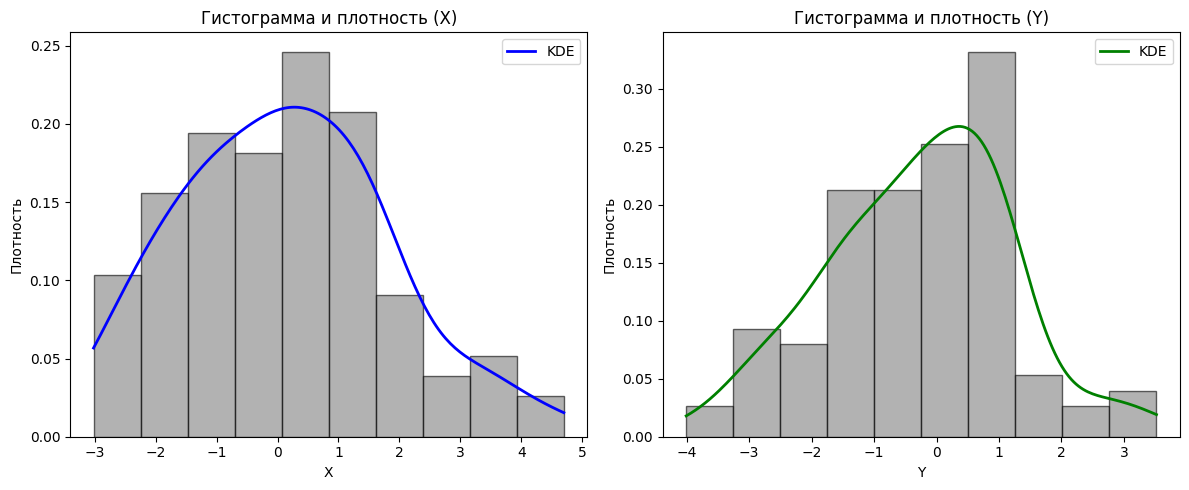

In [2]:
from scipy.stats import gaussian_kde

# Подготовим данные по осям
x = data[:, 0]
y = data[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма и KDE для X
axes[0].hist(x, bins=10, density=True, alpha=0.6, color='gray', edgecolor='black')
kde_x = gaussian_kde(x)
x_vals = np.linspace(x.min(), x.max(), 200)
axes[0].plot(x_vals, kde_x(x_vals), color='blue', linewidth=2, label='KDE')
axes[0].set_title('Гистограмма и плотность (X)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Плотность')
axes[0].legend()

# Гистограмма и KDE для Y
axes[1].hist(y, bins=10, density=True, alpha=0.6, color='gray', edgecolor='black')
kde_y = gaussian_kde(y)
y_vals = np.linspace(y.min(), y.max(), 200)
axes[1].plot(y_vals, kde_y(y_vals), color='green', linewidth=2, label='KDE')
axes[1].set_title('Гистограмма и плотность (Y)')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Плотность')
axes[1].legend()

plt.tight_layout()
plt.show()

<!-- #region id="6e8398b0" -->
### Задание 3 (2 балла)

Загрузите набор данных ["Ирисы Фишера"]. 
Создайте тепловую карту с корреляциями между признаками, строки и столбцы которой должны быть подписаны названиями признаков. 
Важно использовать matplotlib. 
Прямая корреляция должна отображаться зеленым цветом, обратная — красным, а отсутствие корреляции — белым. 
Сделайте график достаточно крупным.

**Подсказка:** используйте `plt.xticks`, `plt.yticks`, `plt.imshow`, `plt.colorbar`

Also build the same heatmap using seaborn.heatmap
<!-- #endregion -->

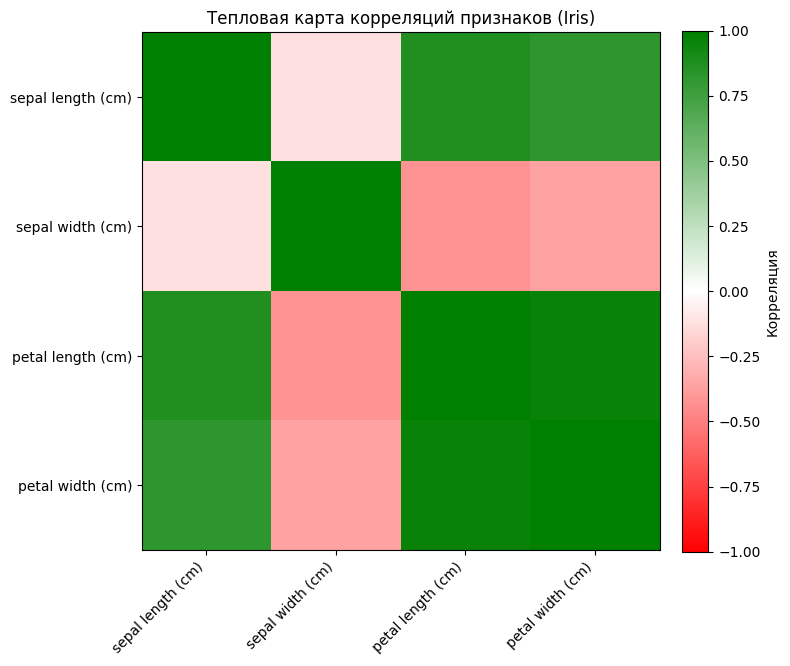

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# Загружаем данные
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Вычисляем корреляцию между признаками
corr = df.corr()

# Настраиваем colormap: от -1 (красный) через 0 (белый) до +1 (зеленый)
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list('red_white_green', ['red', 'white', 'green'])

# Рисуем тепловую карту с matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Устанавливаем подписи осей
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# Добавляем цветовую шкалу
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Корреляция')

ax.set_title('Тепловая карта корреляций признаков (Iris)')
plt.tight_layout()
plt.show()

## Задание 4 (1 балл)

Создайте такую же тепловую карту, используя `seaborn.heatmap`.


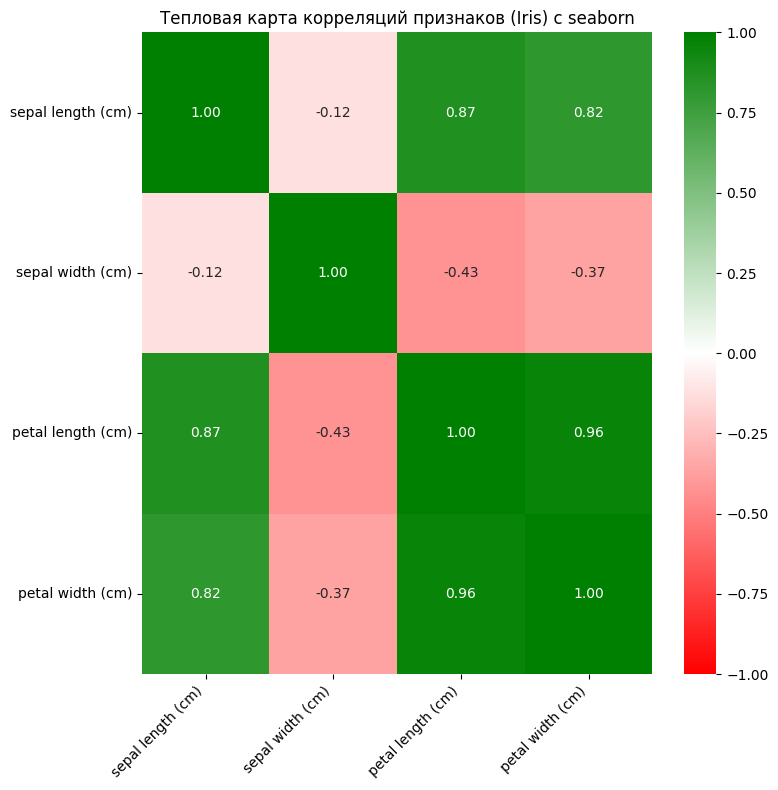

In [4]:
import seaborn as sns

# Рисуем тепловую карту с seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций признаков (Iris) с seaborn')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()